In [323]:
# Import required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [324]:
insurance_data = pd.read_csv('insurance.csv') # Load the required dataset

In [325]:
insurance_data.shape # To have an overall idea of the size of data we are dealing with

(1338, 7)

In [326]:
insurance_data.columns # Analyze the name and rename if there are any errors

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [327]:
insurance_data.head(5) # Displays head of the dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [328]:
# Now lets look at the 5 Number Summary (Box plot variables) of the dataset
insurance_data.describe()
# Mean - central tendency ; tells about the average of that variable and prone to outliers.
# Count - Returns number of Non null values in that column
# Min - Minimum value in that column ; 0%
# I1 - 25%
# 12 - 50%
# I3 - 75%
# Max - Maximum value in that column ; 100%
# Variance - Mean of squared difference between each value and the mean of the variable.
# Std - Standard Deviation : Square root of variance and deduced as it has the same unit as the column unit


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


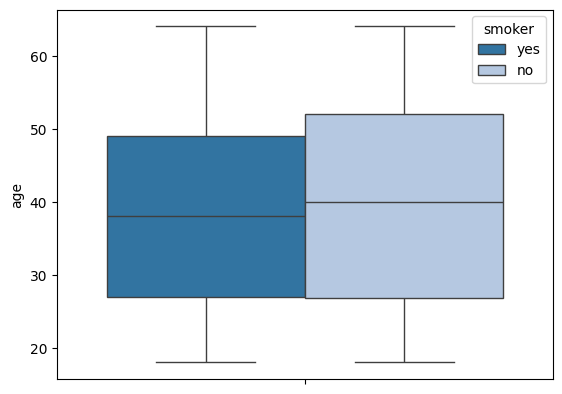

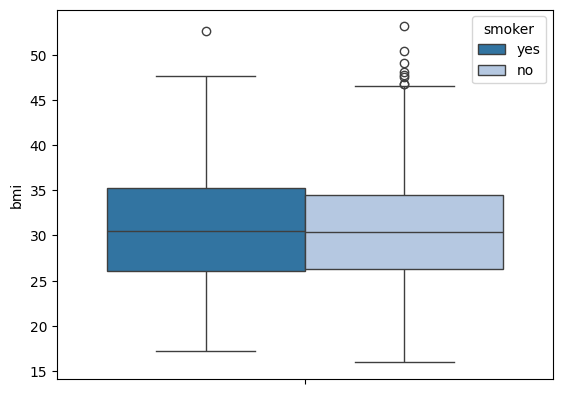

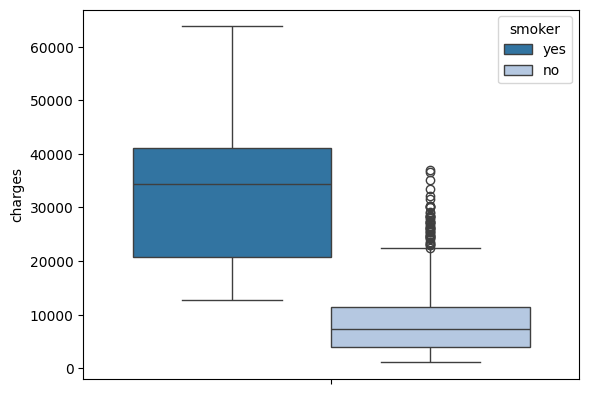

In [329]:
for x in ['age','bmi','charges']:
    sns.boxplot(
        data = insurance_data,
        y = x,
        hue = 'smoker',
        palette = 'tab20'
    )
    plt.show()


In [330]:
# The size of the boxplot tells about the distribution of that variable and also the spread of it .
# The placement of the box : At center , At min end  or At max end tells us about the skewness of the data .
# It tells where most of the data lies in the quartiles and this can be confirmed using a histplot , displot and kdeplot later.
# The black spots are the outliers and these values are those who are less than the min value or more than the max value calculated by the formula .

# For example in the above graph as we can see the non smoker box plot is right skewed and tend to have more outliers which
# means that there are many values in that column which are above the maximum calculated 100%(percentile).

In [331]:
# Covariance tells us about the direction of the correlated variables.
# It is not reliable as it is dependent on scale , so we use a better measure called correlation.
insurance_data.cov(numeric_only=True)

,age,bmi,children,charges
age,197.401387,9.362337,0.719303,5.087480e+04
bmi,9.362337,37.187884,0.093795,1.464730e+04
children,0.719303,0.093795,1.453213,9.926742e+02
charges,50874.802298,14647.304426,992.674197,1.466524e+08


In [332]:
# Correlation is in the domain -1 to 1 and the sign here denotes the type of correlation.
# The more positive the correlation it is closer to 1 and vice versa
# If the correlation is 0 that means the variables are not correlate
insurance_data.corr(numeric_only=True)
# Note : Correlation does not imply causation.

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: xlabel='age', ylabel='charges'>

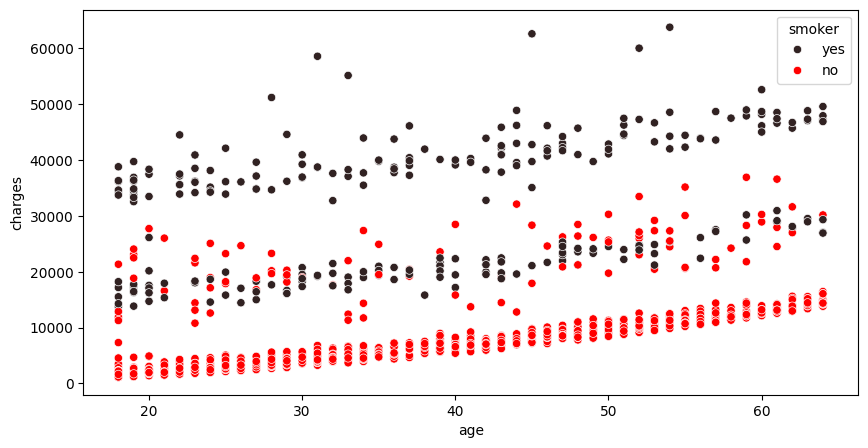

In [333]:
# As from the correlation observed we see that age and charges are highest correlated ones , so when scatterplot was
# plotted, I found out that there is a positive correlation between the non smoker and charges .
# Also found out that smoker tend to have very high charges .
plt.figure(figsize=(10,5))
sns.scatterplot(
    data = insurance_data,
    x = 'age',
    y = 'charges',
    hue = 'smoker',
    palette = 'dark:red',
    # style = 'sex'
)

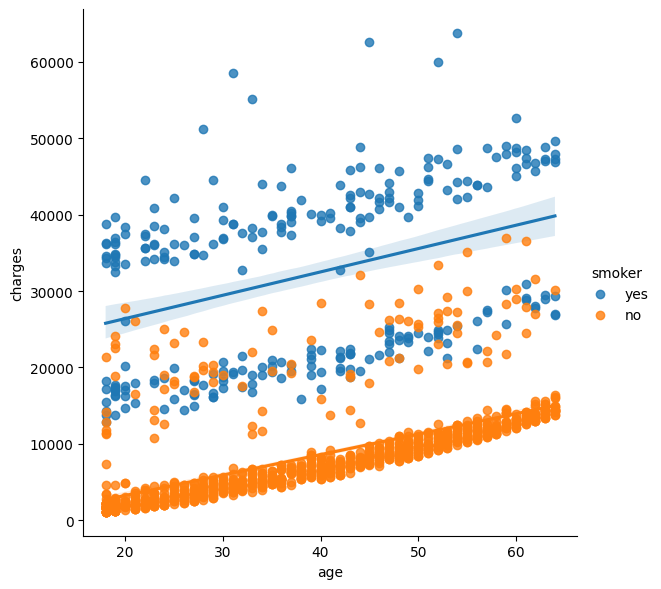

In [334]:
sns.lmplot(
    data = insurance_data,
    x = 'age',
    y = 'charges',
    # col = 'sex',
    palette = 'tab10',
    hue = 'smoker',
    height = 6,
    aspect = 1,
)

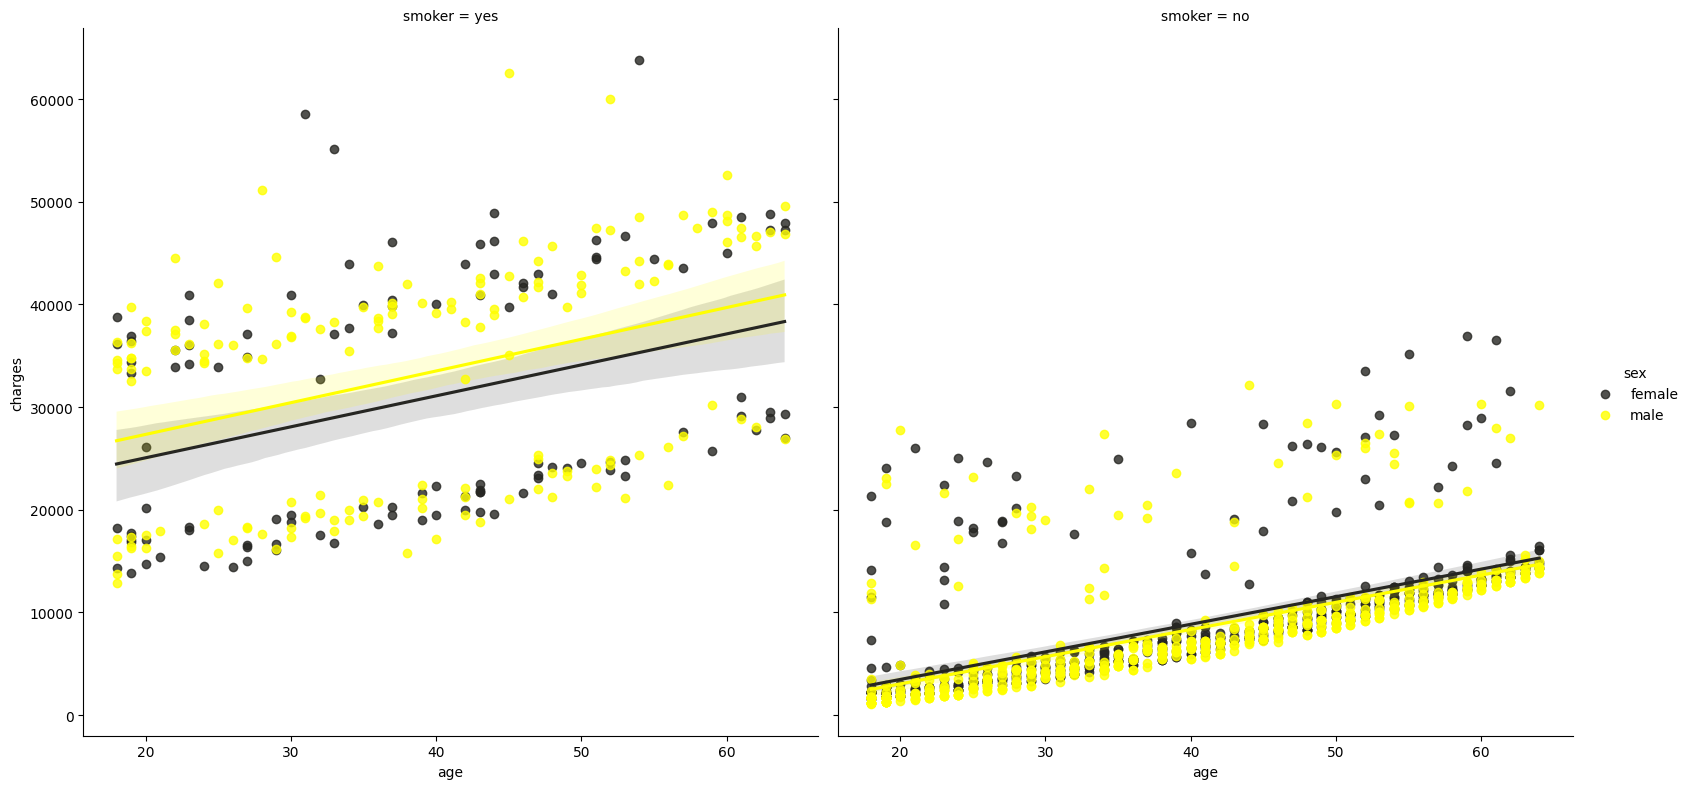

In [335]:
sns.lmplot(
    data = insurance_data,
    x = 'age',
    y = 'charges',
    col = 'smoker',
    palette = 'dark:yellow',
    hue = 'sex',
    height = 8,
    aspect = 1,
)

In [336]:
# Now to Analyze two categorical columns we can use a crosstab 

In [337]:
pd.crosstab(index=insurance_data['smoker'],columns=insurance_data['sex'])

sex,female,male
smoker,,
no,547,517
yes,115,159


In [338]:
# Helps us detect if there dtype for each and whether we need any transformations on them.
# Also we can check the Non null count to loom for the no of rows in each column having non value .
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [339]:
# For better analysis on null values and to fetch the sum we use this:
insurance_data.isna().sum()
# As we dont have any null values here it is 0 , but if there are any it will be displayed with this function.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

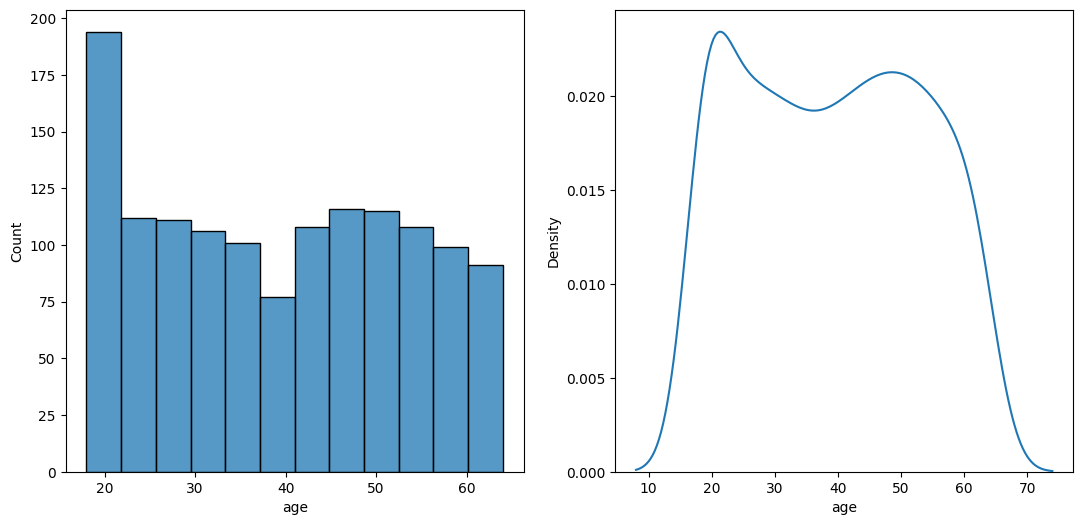

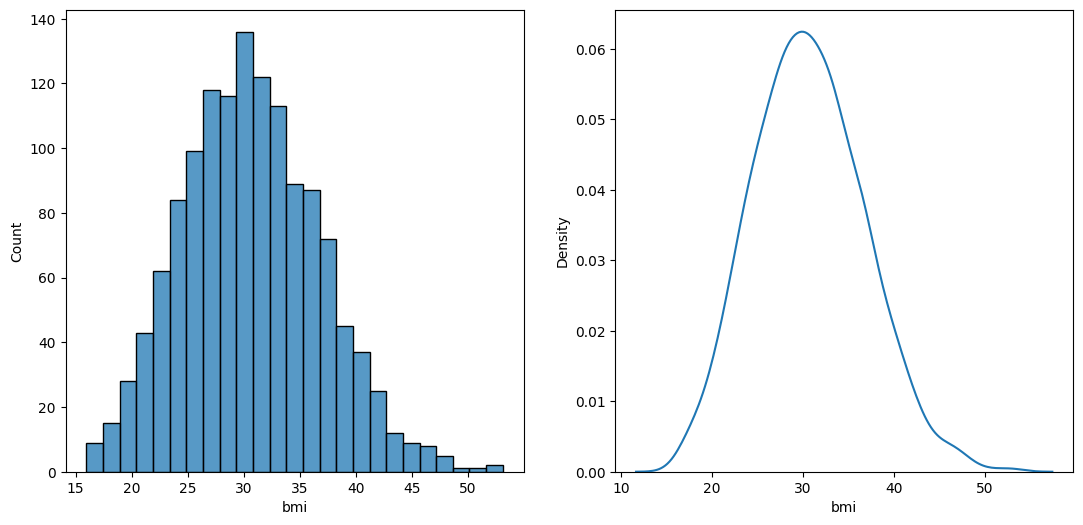

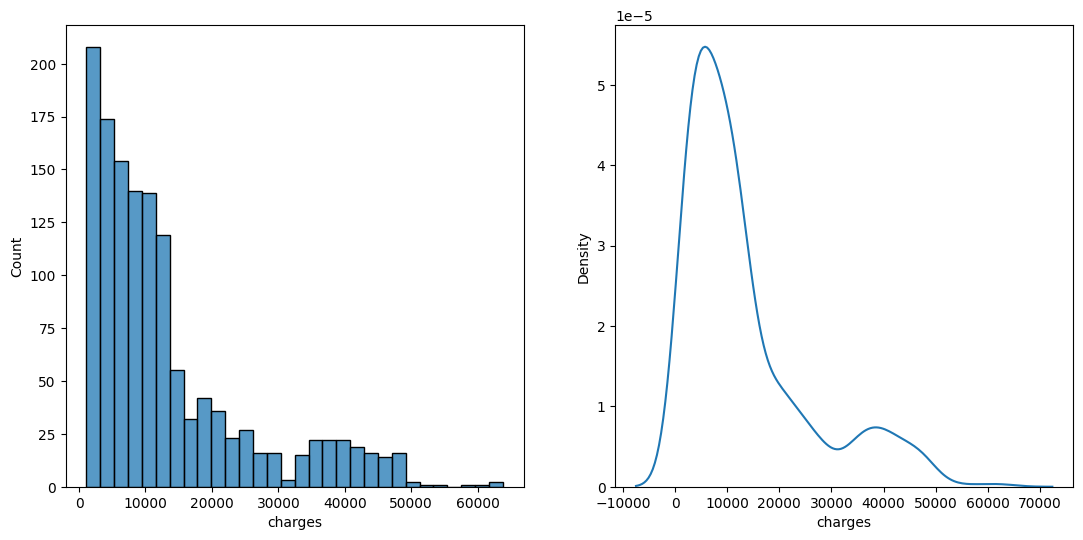

In [340]:
# Now we will check the distribution for each column .
for x in ['age','bmi','charges']:
    plt.figure(figsize=(13,6))
    # Histplot for each column (y axis has count / occurences)
    plt.subplot(121)
    sns.histplot(
        data = insurance_data,
        x = x
    )
    # Kernal Density Estimation for each column (y axis has probability density)
    plt.subplot(122)
    sns.kdeplot(
        data = insurance_data,
        x = x
    )
    plt.show()


In [341]:
# From the graph I interpret :
'''
    charges : They have a log normal distribution from the shape of the histplot and the kde curve.
    bmi : This follows a good bell shaped very good normal distribution.
    age : Follows a unfiorm like distribution but has a spike at the start so it needs to be transformed using different transformations.
'''

'\n    charges : They have a log normal distribution from the shape of the histplot and the kde curve.\n    bmi : This follows a good bell shaped very good normal distribution.\n    age : Follows a unfiorm like distribution but has a spike at the start so it needs to be transformed using different transformations.\n'

In [342]:
# Now lets use the skew function to get a better grasp 
for x in ['age','bmi','charges']:
    print(f'Skeweness for {x} is {insurance_data[x].skew()}')

Skeweness for age is 0.05567251565299186
Skeweness for bmi is 0.2840471105987448
Skeweness for charges is 1.5158796580240388


In [343]:
# As visualized before the charges column is highly skewed .
# Note : Skewness can be calculated for any of the distribution and use these values with caution.

In [344]:
# To better understand this we will be plotting qqplots for this . 
# We need the scipy library for this
import scipy.stats as stats

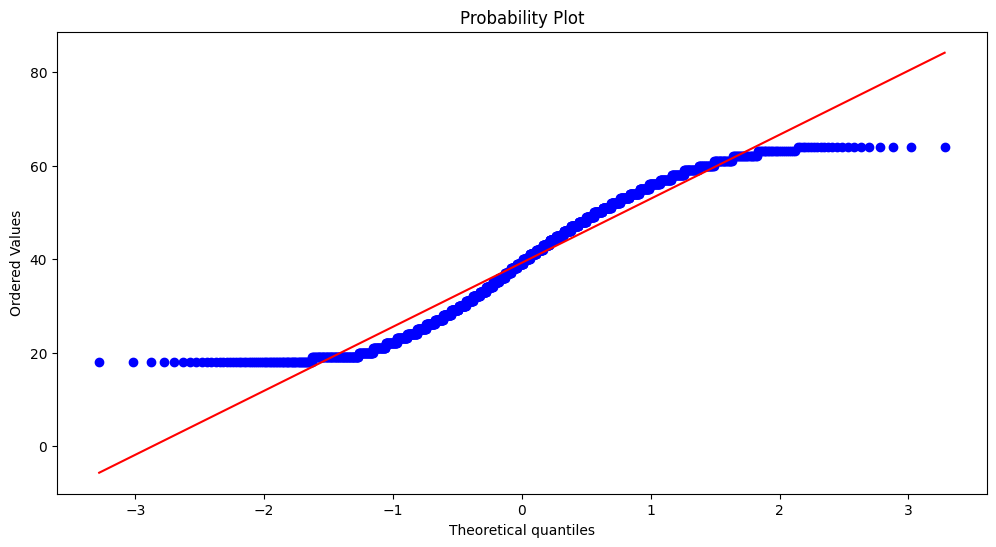

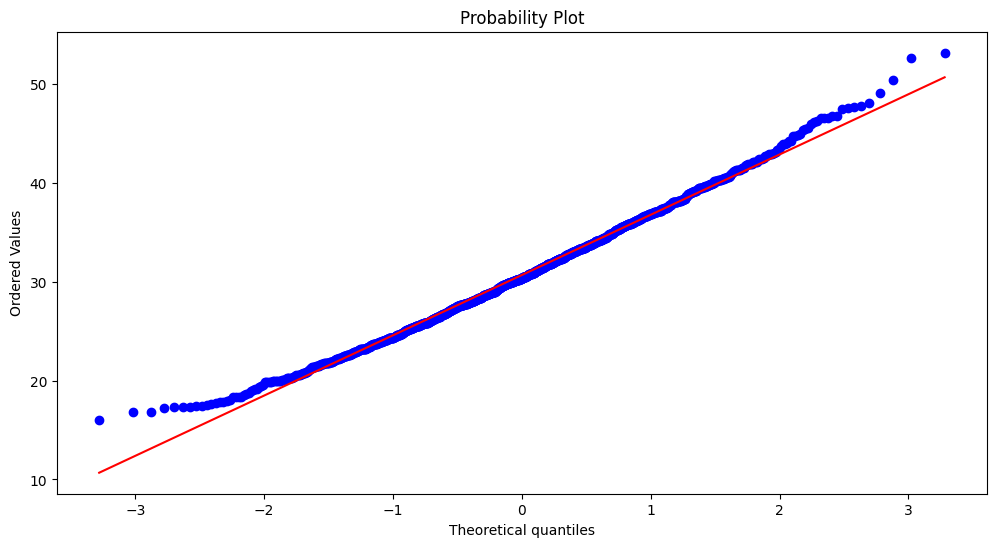

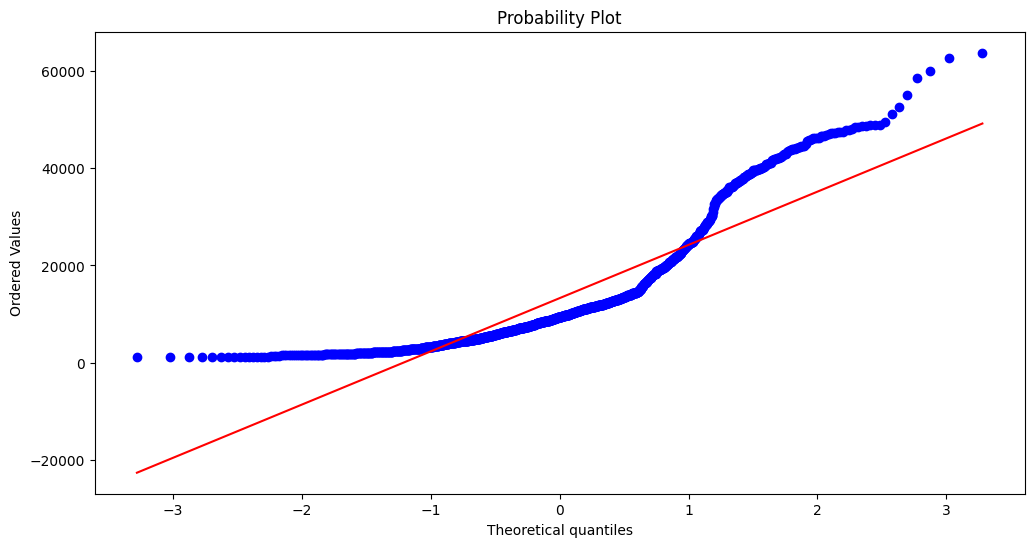

In [345]:
for x in ['age','bmi','charges']:
    plt.figure(figsize=(12,6))
    stats.probplot(
        x = insurance_data[x],
        dist = 'norm',
        plot = plt
    )
    plt.show()

In [346]:
# As we can see that the bmi is the only column which is normally distributed as we can see that its qqplot has all the points 
# on the line , whereas age has tails and charges has scattered points .

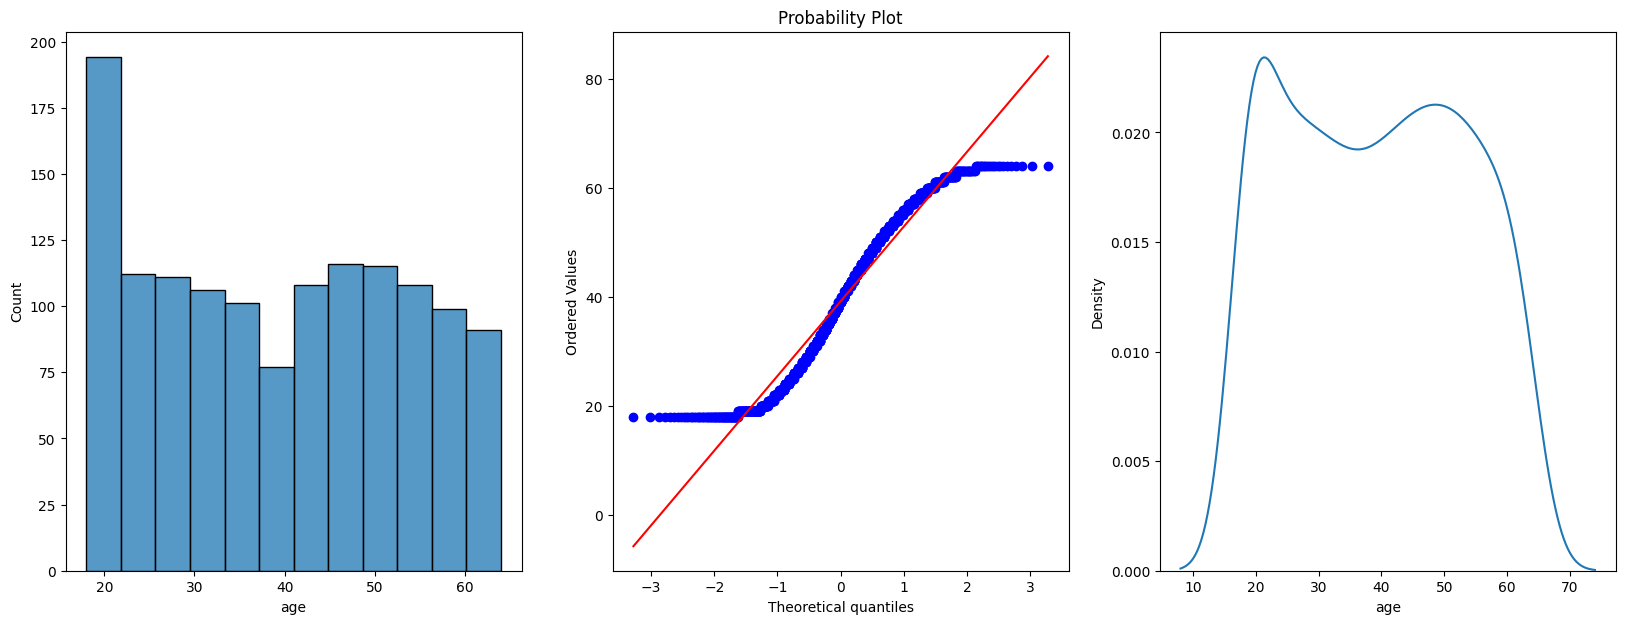

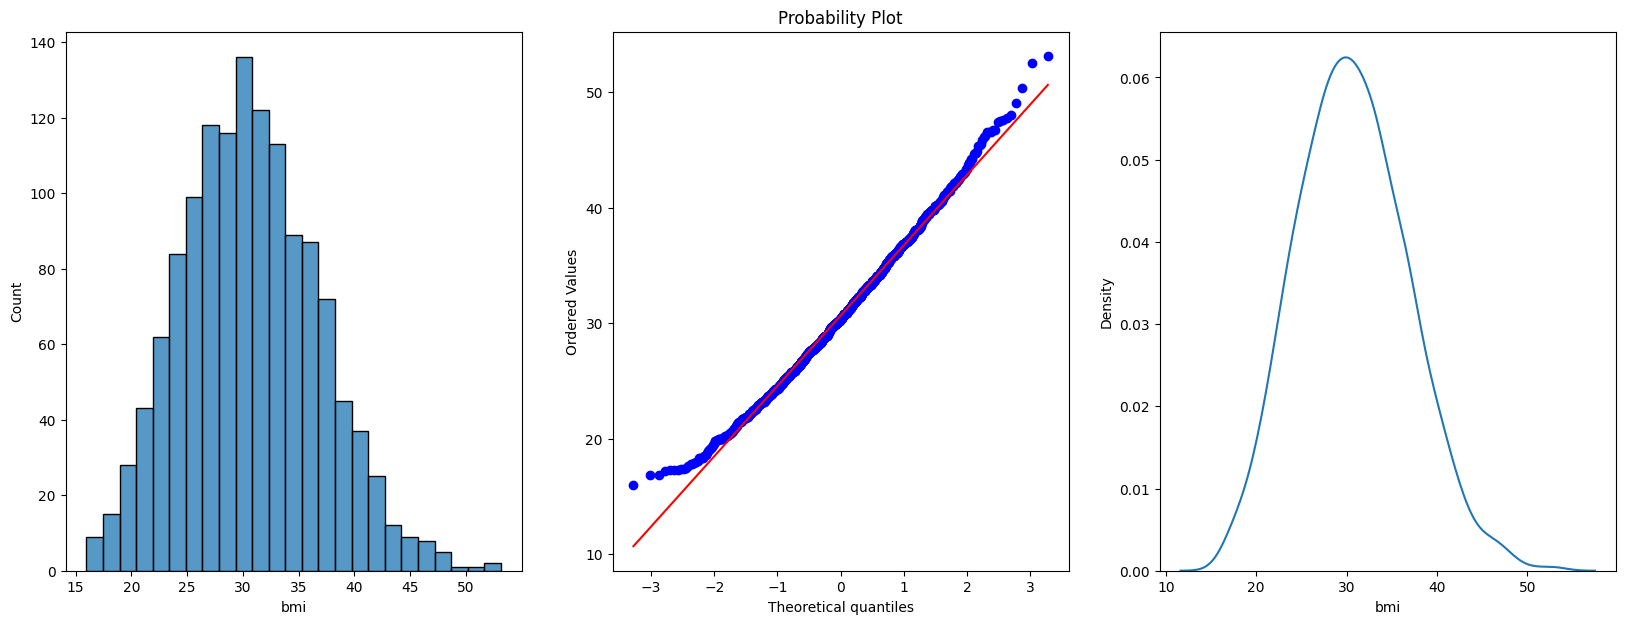

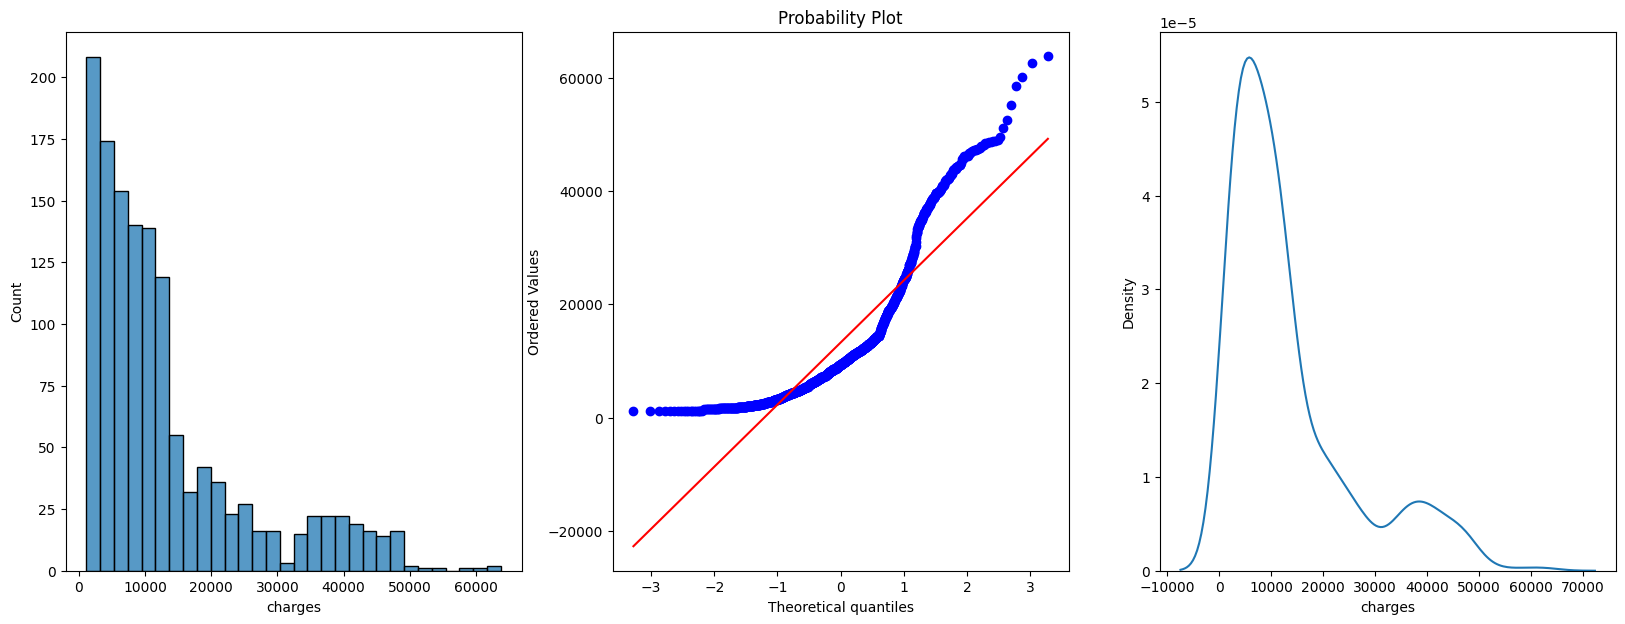

In [347]:
# Overall Analysis and comparisions
for x in ['age','bmi','charges']:
    plt.figure(figsize=(20,7))
    plt.subplot(131)
    sns.histplot(
        data = insurance_data,
        x = x
    )
    plt.subplot(132)
    stats.probplot(
        x = insurance_data[x],
        dist = 'norm',
        plot = plt
    )
    plt.subplot(133)
    sns.kdeplot(
        data = insurance_data,
        x = x
    )
    plt.show()

In [348]:
# Now to check for any improvements I will be applying log transform to the charges columns and check if there is any changes seen.
# Intuition used : The Distribution is right skewed ( we can use log transformer if the data is right is skewed for improvements) 
#  and Secondly judging by the shape I have determined that the shape is somewhat similar to log normal distribution.
# Function transformer helps us to apply specific functon to the passed column/s .
# Here we will be using the log function (np.log1p)
from sklearn.preprocessing import FunctionTransformer

In [349]:
logfunction = FunctionTransformer(func = np.log1p)

In [350]:
# To be honest the first step should be splitting datasets and then applying transformation 
# but for practice I will skip those for now. 
logfunction.fit(insurance_data['charges'])
# It automatically scales the values inside so need to apply any scaler transformation explicitly.
insurance_data['log_charges'] = logfunction.fit_transform(insurance_data['charges']) # Store in new column


In [351]:
insurance_data.head() # Check the new column values

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,9.734236
1,18,male,33.770,1,no,southeast,1725.55230,7.453882
2,28,male,33.000,3,no,southeast,4449.46200,8.400763
3,33,male,22.705,0,no,northwest,21984.47061,9.998137
4,32,male,28.880,0,no,northwest,3866.85520,8.260455


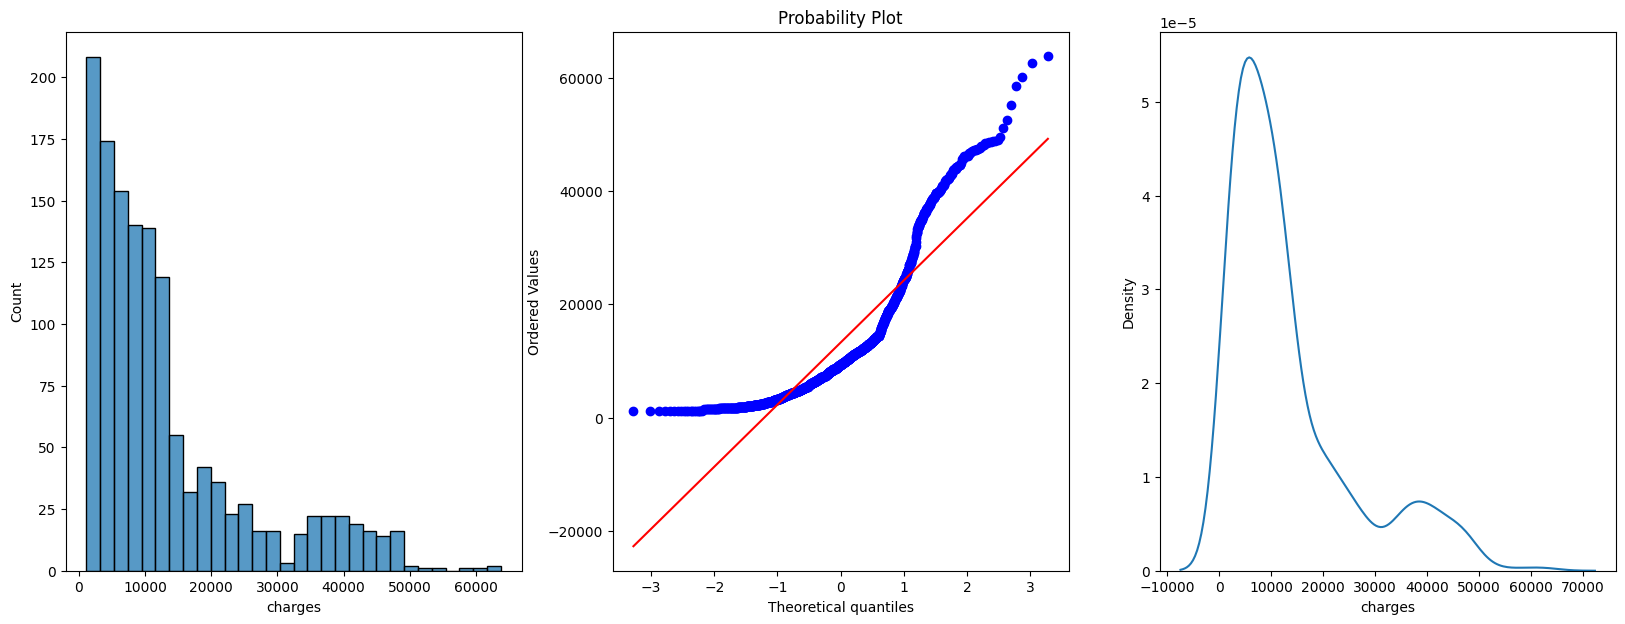

Skeweness for charges is 1.5158796580240388


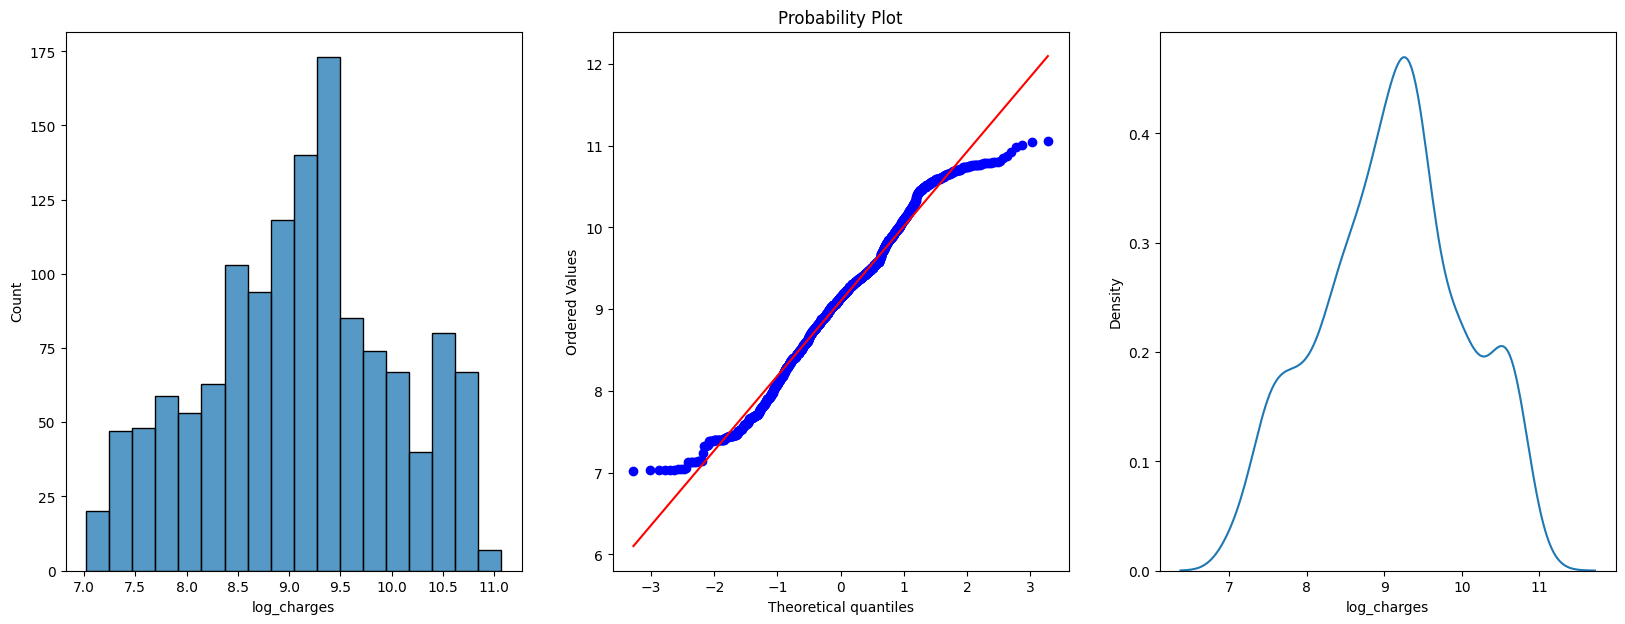

Skeweness for log_charges is -0.08981728740026824


In [352]:
# Plotting the new points 
for x in ['charges','log_charges']:
    plt.figure(figsize=(20,7))
    plt.subplot(131)
    sns.histplot(
        data = insurance_data,
        x = x
    )
    plt.subplot(132)
    stats.probplot(
        x = insurance_data[x],
        dist = 'norm',
        plot = plt
    )
    plt.subplot(133)
    sns.kdeplot(
        data = insurance_data,
        x = x
    )
    plt.show()
    print(f'Skeweness for {x} is {insurance_data[x].skew()}')

In [353]:
# As we see how the plots have grealty improved due to the log transformation .
# We can also apply many other advance transformations like Box-cox and Yeo-Johnson to experiment later (maybe at the end).
# Also we can see the skewness is now closer to 0 and have been greatly reduced.
# Further we can use the log_charges column to be the inputs for our ML models.

In [354]:
# Now for the remaining column age we will check using different transformation methods and check for improvements.
# We will be using column transformer to reduce load.
from sklearn.compose import ColumnTransformer 

In [355]:
def age_transformer(parameter):
    # Column Transformer
    transformer1 = ColumnTransformer(
        transformers = [
            ('function_transformer',FunctionTransformer( func = parameter),['age'])
        ]
    )
    # Fit using the fit_transform

    insurance_data['age_transformed'] = transformer1.fit_transform(insurance_data)

    # Plot the new column

    x = 'age_transformed'
    
    plt.figure(figsize=(20,7))
    plt.subplot(131)
    sns.histplot(
        data = insurance_data,
        x = x
    )
    plt.subplot(132)
    stats.probplot(
        x = insurance_data[x],
        dist = 'norm',
        plot = plt
    )
    plt.subplot(133)
    sns.kdeplot(
        data = insurance_data,
        x = x
    )
    plt.show()
    print(f'Skeweness for {x} is {insurance_data[x].skew()}')



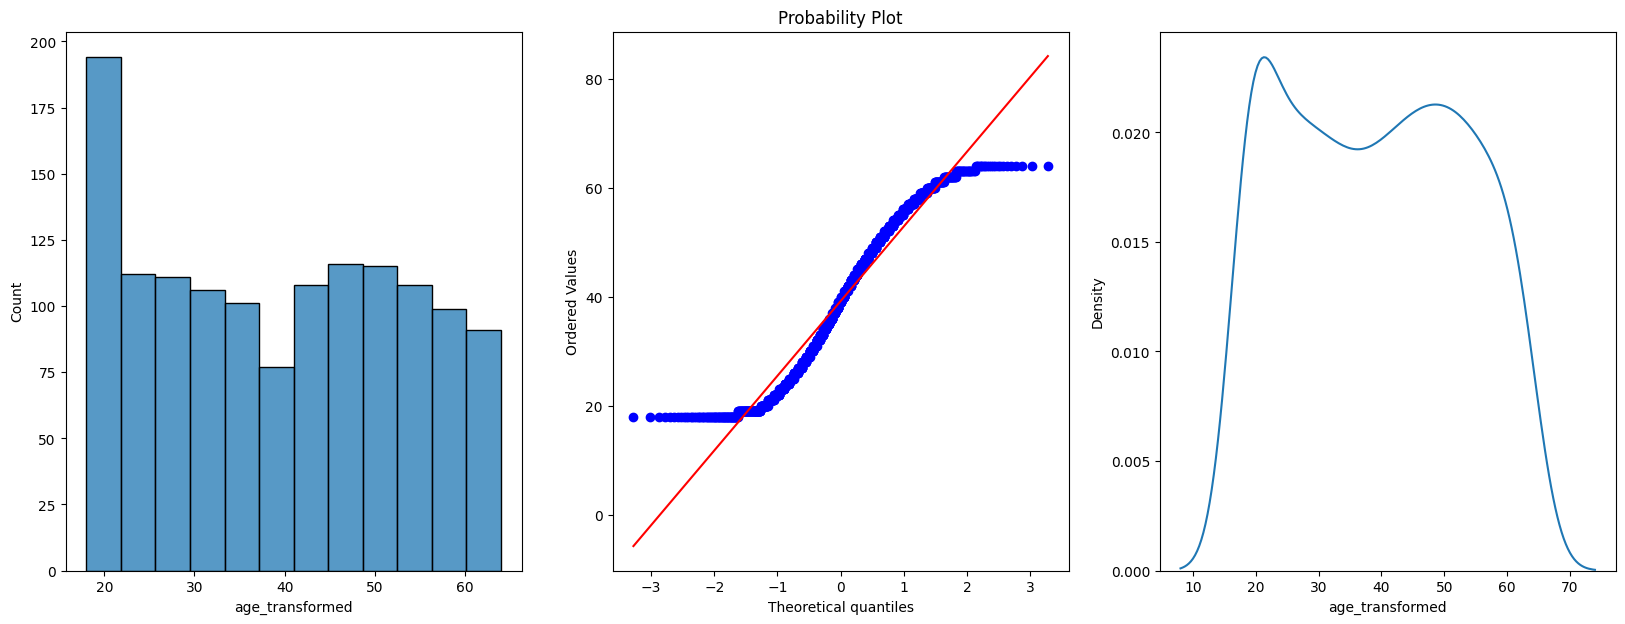

Skeweness for age_transformed is 0.05567251565299186


In [356]:
age_transformer(lambda x : x) # Original value 

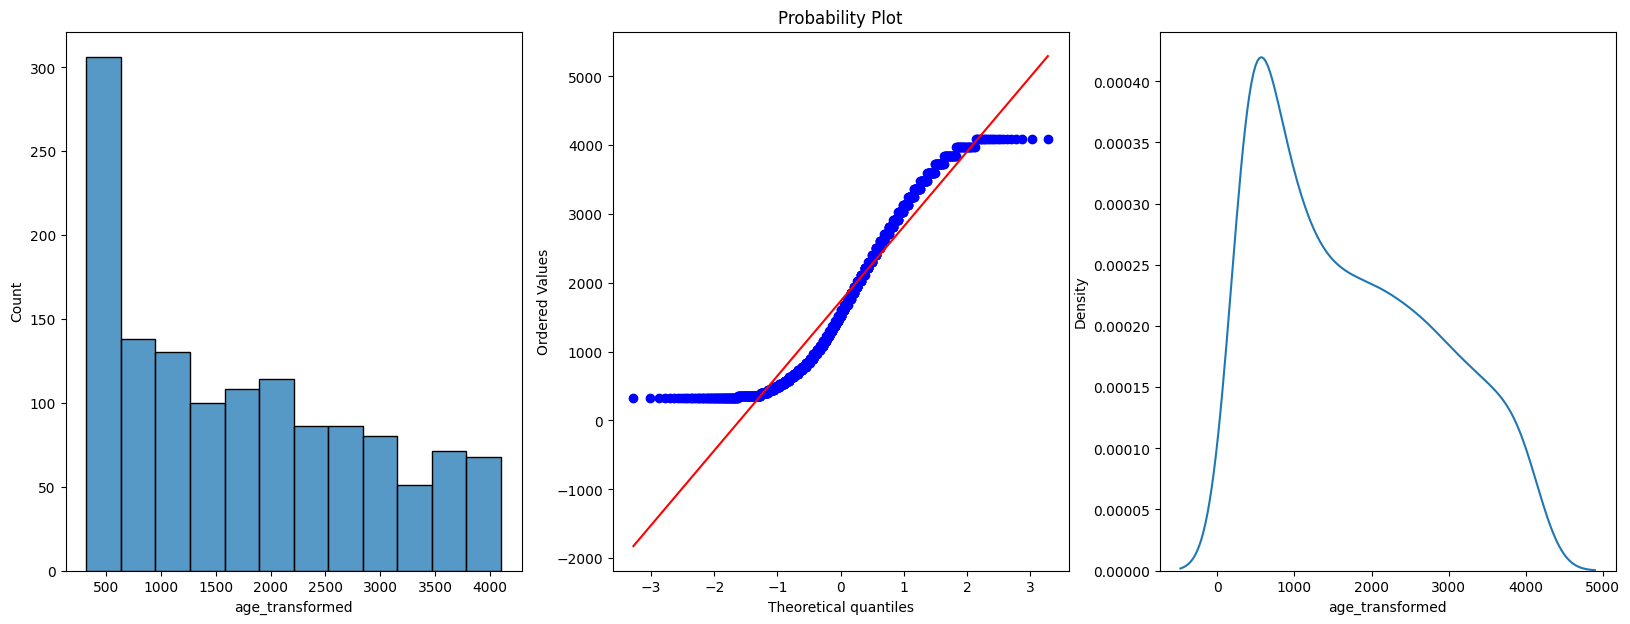

Skeweness for age_transformed is 0.4529857910029351


In [357]:
age_transformer(lambda x : x**2) # Applying Square transformation 

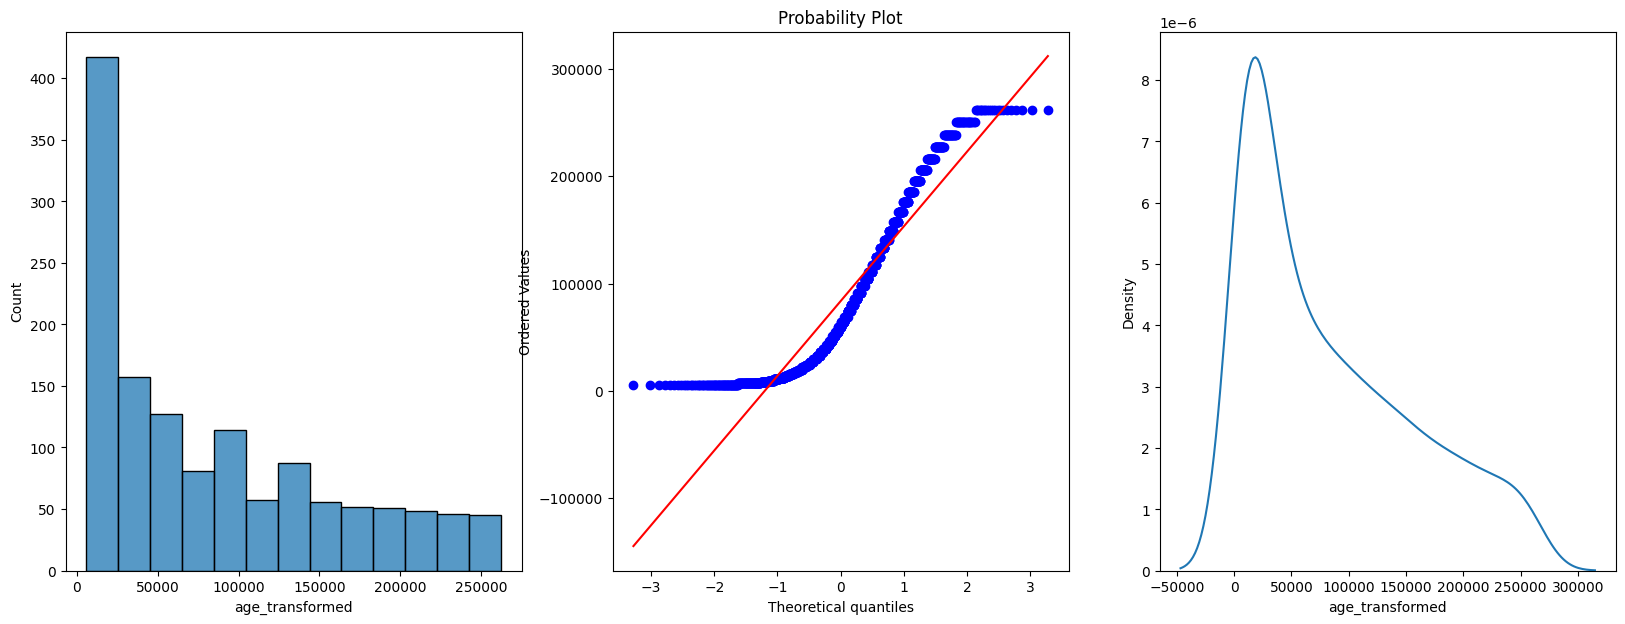

Skeweness for age_transformed is 0.8056262143142704


In [358]:
age_transformer(lambda x : x**3) # Applying cube transformation 

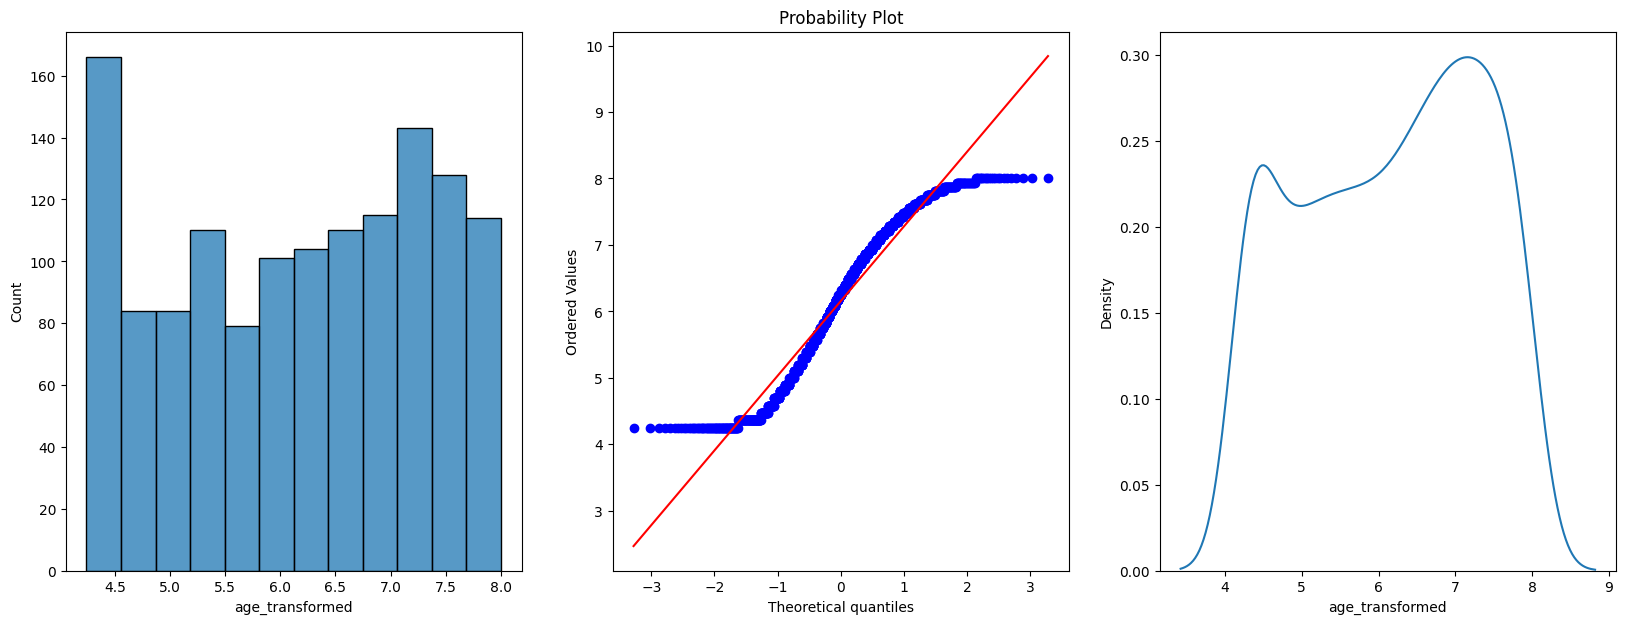

Skeweness for age_transformed is -0.15665995967409962


In [359]:
age_transformer(lambda x : x**(1/2)) # Applying Square root transformation # Better than square 

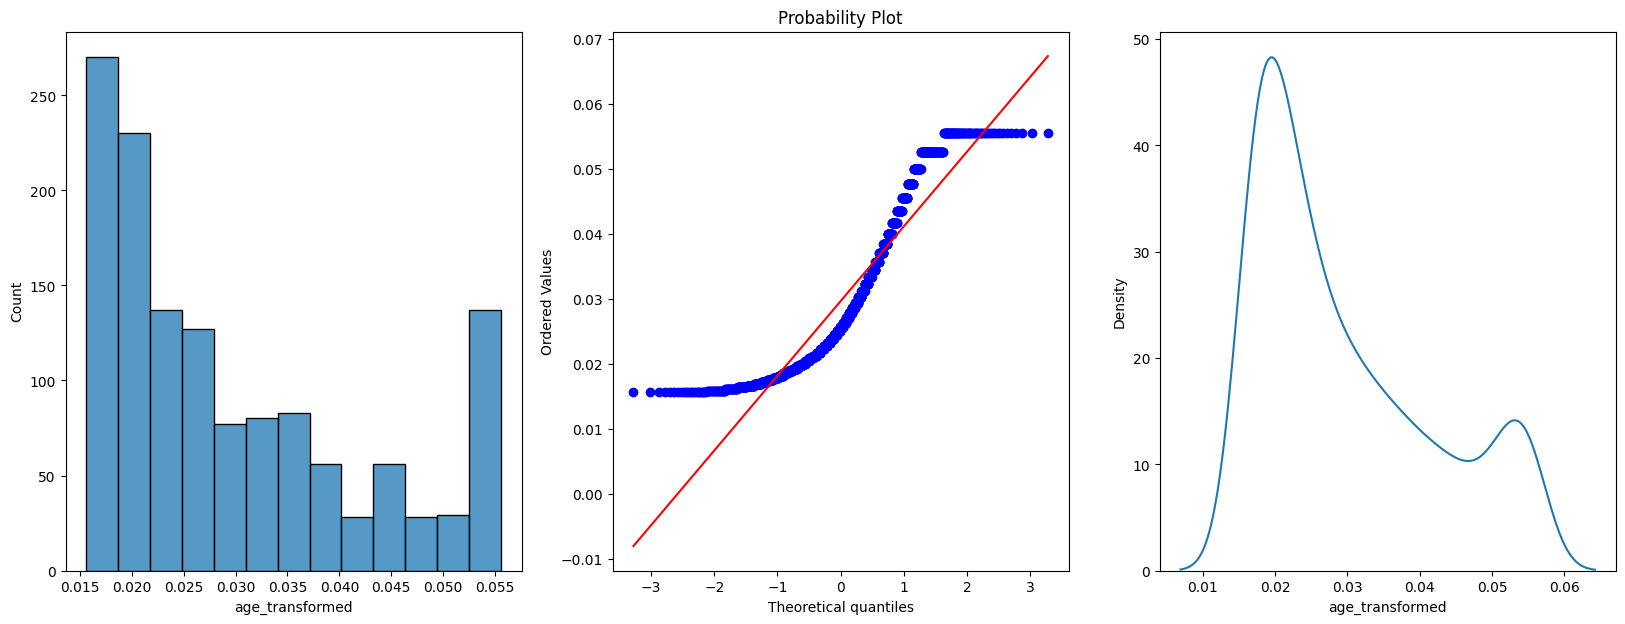

Skeweness for age_transformed is 0.8037331872729018


In [360]:
age_transformer(lambda x : 1/(x+0.000001)) # Applying Reciprocal transformation (The small value is added to avoid null if present in data)

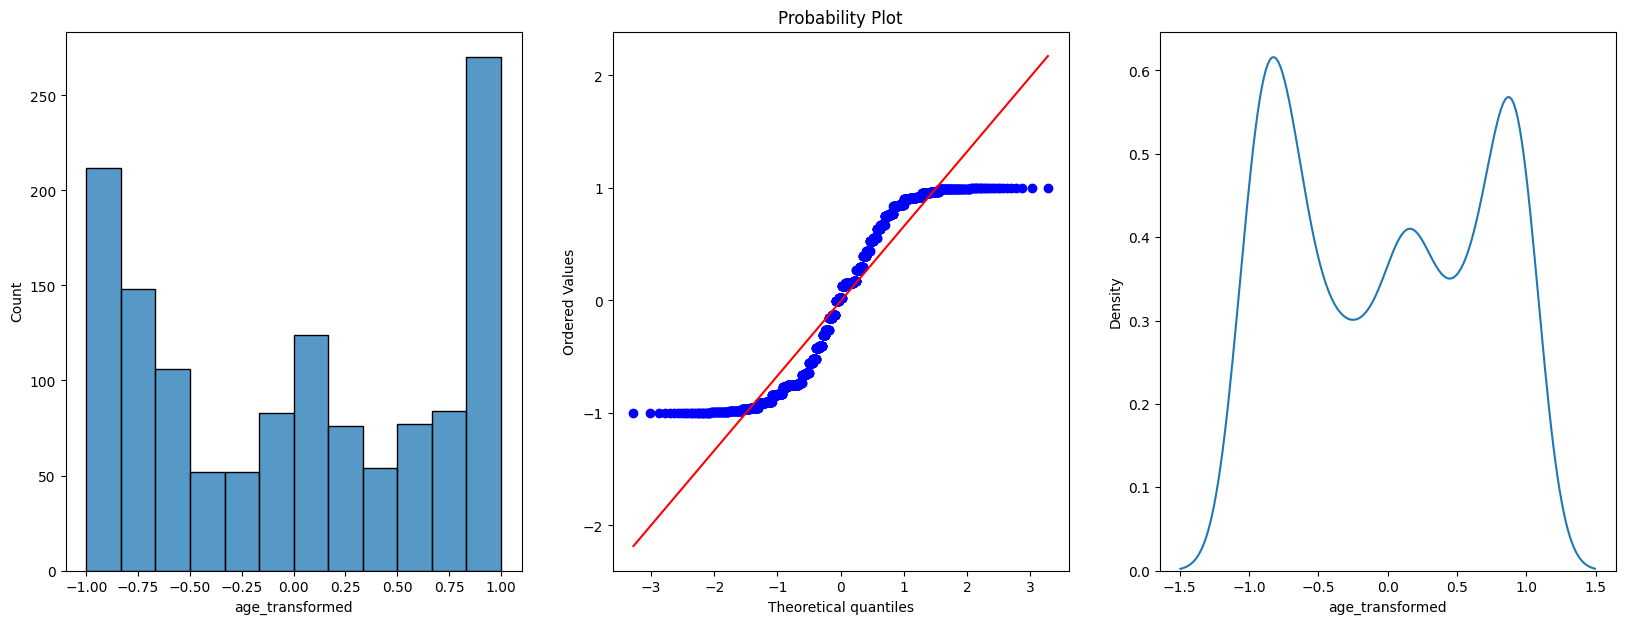

Skeweness for age_transformed is 0.024606660477316595


In [361]:
age_transformer(lambda x : np.sin(x)) # Applying Sin transformation 

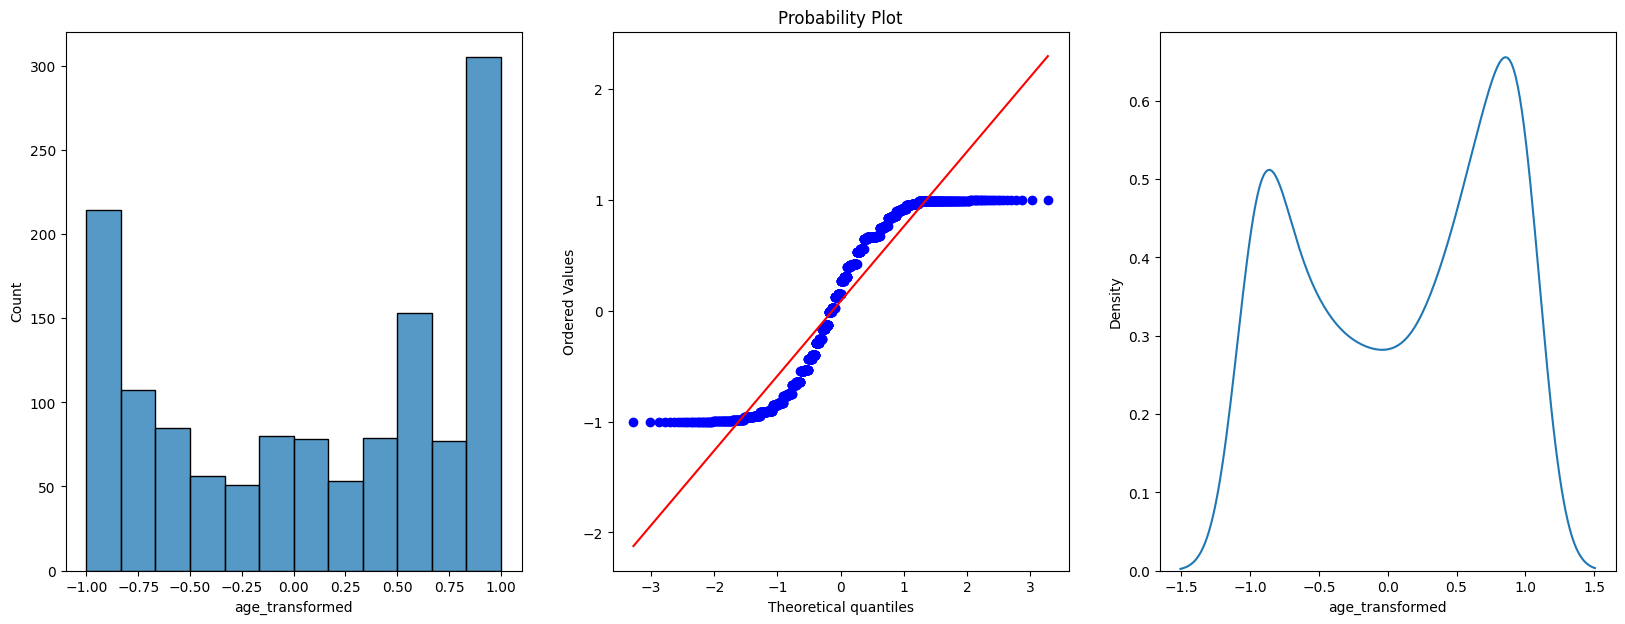

Skeweness for age_transformed is -0.1964324130331223


In [362]:
age_transformer(lambda x : np.cos(x)) # Applying Cosine transformation 

In [363]:
# To be honest there is not a single drastic change found here so we will proceed with using Power Transformer
from sklearn.preprocessing import PowerTransformer

In [364]:
def age_power_transformer(method):
    # Column Transformer
    transformer1 = ColumnTransformer(
        transformers = [
            ('power_transformer',PowerTransformer(method = method),['age'])
        ]
    )
    # Fit using the fit_transform

    insurance_data['age_power_ransformed'] = transformer1.fit_transform(insurance_data)

    # Plot the new column

    x = 'age_power_ransformed'
    
    plt.figure(figsize=(20,7))
    plt.subplot(131)
    sns.histplot(
        data = insurance_data,
        x = x
    )
    plt.subplot(132)
    stats.probplot(
        x = insurance_data[x],
        dist = 'norm',
        plot = plt
    )
    plt.subplot(133)
    sns.kdeplot(
        data = insurance_data,
        x = x
    )
    plt.show()
    print(f'Skeweness for {x} is {insurance_data[x].skew()}')



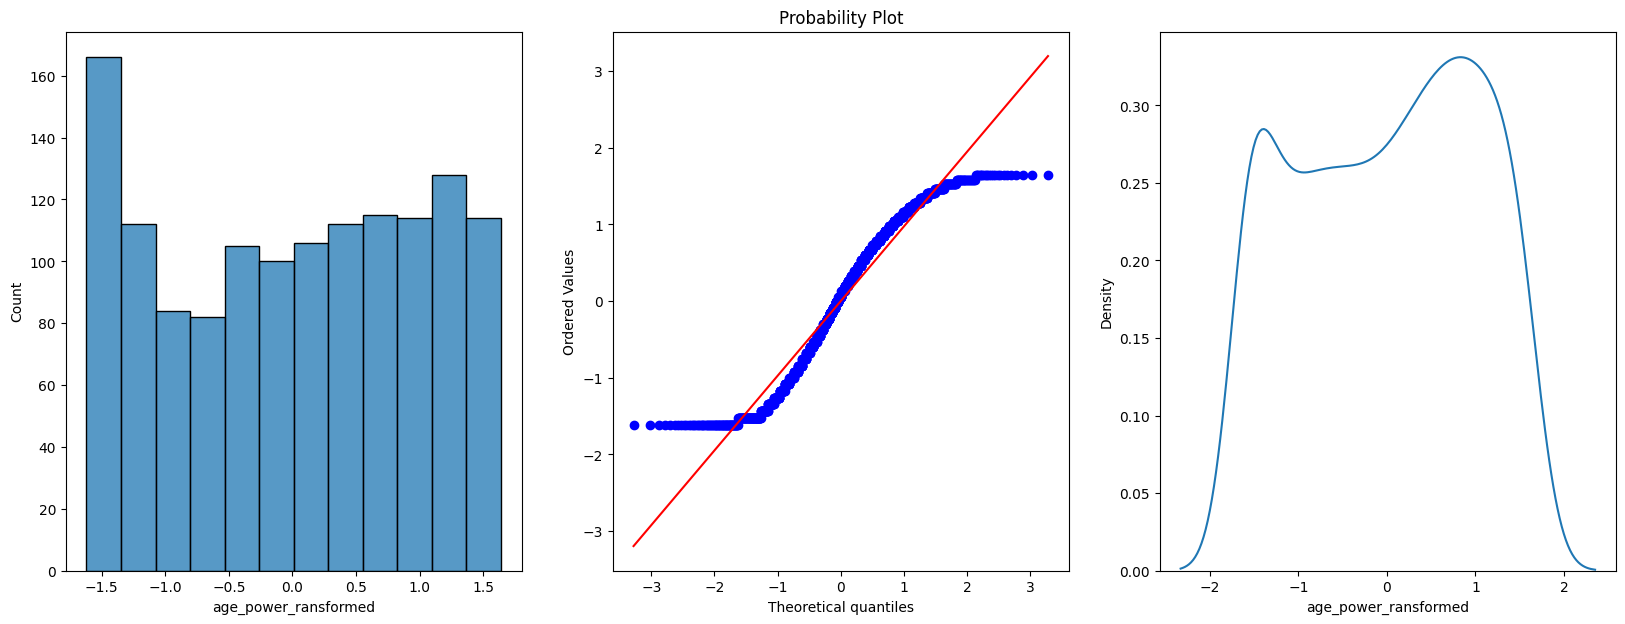

Skeweness for age_power_ransformed is -0.10372974771151515


In [365]:
age_power_transformer('box-cox') 

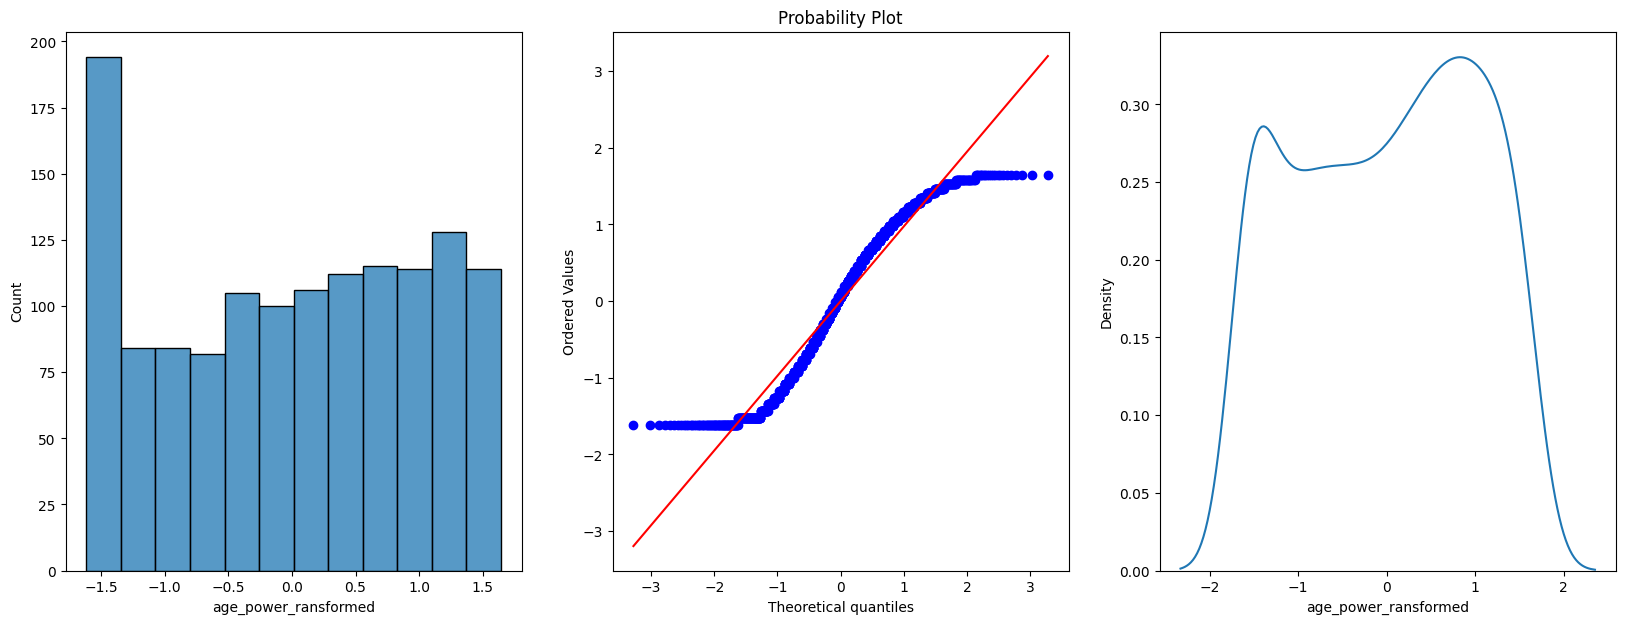

Skeweness for age_power_ransformed is -0.10019327493020738


In [366]:
age_power_transformer('yeo-johnson') 

In [367]:
# After applying a lot of transformation I came with the conclusion that the original value had the best distribution and less skewness 
# among all of the values .
# Possible further alternatives : Quantile Transformer , Binning
# I did not transformed cause from the sources sometimes : Original skewness is better than added Transformed skewness (>)
insurance_data = insurance_data.drop(columns = ['age_power_ransformed','age_transformed']) # Dropping the changes 

In [368]:
insurance_data.head() # Quick scan

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,9.734236
1,18,male,33.770,1,no,southeast,1725.55230,7.453882
2,28,male,33.000,3,no,southeast,4449.46200,8.400763
3,33,male,22.705,0,no,northwest,21984.47061,9.998137
4,32,male,28.880,0,no,northwest,3866.85520,8.260455


In [369]:
# Now we can further move on to encoding the categorical columns which are : sex , smoker , region

'''

----------------------------------------------------------------------------------------------------------------------------------------
Column                                                         Values                                               Strategy       
----------------------------------------------------------------------------------------------------------------------------------------
sex                                                        'female', 'male'                                  Mapping / OneHotEncoder
smoker                                                      'yes', 'no'                                      Mapping / OneHotEncoder
region                                       'southwest', 'southeast', 'northwest', 'northeast'                   OneHotEncoder
----------------------------------------------------------------------------------------------------------------------------------------


'''

"\n\n----------------------------------------------------------------------------------------------------------------------------------------\nColumn                                                         Values                                               Strategy       \n----------------------------------------------------------------------------------------------------------------------------------------\nsex                                                        'female', 'male'                                  Mapping / OneHotEncoder\nsmoker                                                      'yes', 'no'                                      Mapping / OneHotEncoder\nregion                                       'southwest', 'southeast', 'northwest', 'northeast'                   OneHotEncoder\n----------------------------------------------------------------------------------------------------------------------------------------\n\n\n"

In [370]:
# Firstly lets quickly do the mapping for both the columns : sex and smoker
# Lets create the map for them both.

sex_map = {
    'female' : 0,
    'male' : 1
}

smoker_map = {
    'no' : 0,
    'yes' : 1
}

In [371]:
insurance_data['sex'] = insurance_data['sex'].map(sex_map)
insurance_data['smoker'] = insurance_data['smoker'].map(smoker_map)

In [372]:
insurance_data # Quick check

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,0,27.900,0,1,southwest,16884.92400,9.734236
1,18,1,33.770,1,0,southeast,1725.55230,7.453882
2,28,1,33.000,3,0,southeast,4449.46200,8.400763
3,33,1,22.705,0,0,northwest,21984.47061,9.998137
4,32,1,28.880,0,0,northwest,3866.85520,8.260455
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,9.268755
1334,18,0,31.920,0,0,northeast,2205.98080,7.699381
1335,18,0,36.850,0,0,southeast,1629.83350,7.396847
1336,21,0,25.800,0,0,southwest,2007.94500,7.605365


In [373]:
insurance_data.info() # Checking whether the dtypes were handled carefull or not 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   int64  
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   int64  
 5   region       1338 non-null   object 
 6   charges      1338 non-null   float64
 7   log_charges  1338 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 83.8+ KB


In [374]:
# Now lets do OneHotEncoding for the region column 
from sklearn.preprocessing import OneHotEncoder # Import OneHotEncoder from preprocessing sub-library.

In [ ]:
# Lets use a column transformer as in pipelines we are gonna do the same to automate the process.
column_transformer_2 = ColumnTransformer(
    transformers = [
        ('onc', OneHotEncoder(sparse_output=False) , ['region'] )
    ],
    # I havent set the remainder = passthrough cause this is just for demonstration and not a proper workflow
)

In [384]:
transformed_region = column_transformer_2.fit_transform(insurance_data) # Fit transform 

In [385]:
transformed_region # These values are in numpy so we will convert it to pandas dataframe

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1338, 4))

In [386]:
cols_region = column_transformer_2.get_feature_names_out()

In [387]:
transformed_region = pd.DataFrame(transformed_region,columns=cols_region)

In [ ]:
transformed_region # A quick look

,onc__region_northeast,onc__region_northwest,onc__region_southeast,onc__region_southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
1333,0.0,1.0,0.0,0.0
1334,1.0,0.0,0.0,0.0
1335,0.0,0.0,1.0,0.0
1336,0.0,0.0,0.0,1.0


In [ ]:
insurance_data = pd.concat([insurance_data,transformed_region],axis=1) # Append the dataframe

In [ ]:
insurance_data # Now we will drop the irrelevant columns

,age,sex,bmi,children,smoker,region,charges,log_charges,onc__region_northeast,onc__region_northwest,onc__region_southeast,onc__region_southwest
0,19,0,27.900,0,1,southwest,16884.92400,9.734236,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,7.453882,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,8.400763,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,9.998137,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,8.260455,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,9.268755,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,northeast,2205.98080,7.699381,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,southeast,1629.83350,7.396847,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,southwest,2007.94500,7.605365,0.0,0.0,0.0,1.0


In [ ]:
insurance_data = insurance_data.drop(columns = ['region','charges']) # Droping them

In [ ]:
insurance_data # Check again

,age,sex,bmi,children,smoker,log_charges,onc__region_northeast,onc__region_northwest,onc__region_southeast,onc__region_southwest
0,19,0,27.900,0,1,9.734236,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,7.453882,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,8.400763,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,9.998137,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,8.260455,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,9.268755,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,7.699381,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,7.396847,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,7.605365,0.0,0.0,0.0,1.0


In [ ]:
insurance_data.info() # A quick dtype check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    1338 non-null   int64  
 1   sex                    1338 non-null   int64  
 2   bmi                    1338 non-null   float64
 3   children               1338 non-null   int64  
 4   smoker                 1338 non-null   int64  
 5   log_charges            1338 non-null   float64
 6   onc__region_northeast  1338 non-null   float64
 7   onc__region_northwest  1338 non-null   float64
 8   onc__region_southeast  1338 non-null   float64
 9   onc__region_southwest  1338 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 104.7 KB


In [ ]:
# Now the data is ready and we can test different ML algos and comeback to make some changes if we want to finetune for performance.
# This workflow I did is purely for understanding , the actual process will be in a pipeline with many column transformers,
# and steps done only after train_test_split as doing transformations before can cause data leak into the models and may introduce
# bias in intermediate use models (StandardScaler,OneHotEncoder,etc).
# Of course proper experimenting like we did and many other analysis steps must be done before further procedure of using Machine Learning models.